# 비어플 3주차 과제_타이타닉_16기 함주헌

##  2. 타이타닉 데이터 EDA 및 전처리

### 0. 도메인 살펴보기 : 타이타닉 데이터

1. 개요
- 타이타닉 데이터셋은 타이타닉 침몰 사건을 기반으로, 탑승객들의 다양한 정보와 생존 여부를 포함하고 있다.

2. 데이터 변수 설명
- 'Survived' : 탑승객이 생존했는지 여부를 나타내는 변수(0 사망, 1 생존)
- 'Pclass' : 승객이 예약한 티켓의 등급(1: 1등석, 2: 2등석, 3: 3등석)
- 'Name' : 승객의 전체 이름
- 'Sex' : 승객의 성별
- 'Age' : 승객의 나이 
- 'SibSp' : 함께 탑승한 형제 또는 배우자 수
- 'Parch' : 함께 탑승한 부모 또는 자녀 수
- 'Ticket' : 승객의 티켓 번호
- 'Fare' : 승객이 지불한 티켓 요금
- 'Cabin' : 승객의 선실 번호
- 'Embarked' : 승객이 탑승한 항구(C: Cherbourg, Q: Queenstown, S: Southampton)

### 2. 데이터 불러오기

In [492]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [494]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 한글 폰트 확인 (Nanum Gothic)
plt.rc('font', family='NanumGothic')

# 경고 메시지 제거
import warnings
warnings.filterwarnings("ignore")

In [393]:
data = pd.read_csv('/Users/zoohunn/Desktop/비어플/Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [395]:
data.shape

(891, 12)

타이타닉 데이터는 891개의 로우와 12개의 칼럼으로 이루어져있다.

In [398]:
# 분류 모델의 타겟 변수인 Survived 속성의 값 분포 확인
print(data['Survived'].value_counts())
survived_cnt = data[data['Survived'] == 1]['Survived'].count()
total_cnt = data['Survived'].count()
print('생존한 사람의 비율은 {0:.2f}'.format((survived_cnt/total_cnt)))

Survived
0    549
1    342
Name: count, dtype: int64
생존한 사람의 비율은 0.38


전체 중 38%가 생존했음을 알 수 있음.

In [401]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [403]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [405]:
data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 3. 결측값/중복값 확인

In [408]:
data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Cabin 열에 가장 많은 결측값이 존재하고, Age, Embarked 열에도 결측값이 존재함을 알 수 있다.

In [411]:
# Age열의 결측값 행들에 대한 정보 찾기
data.loc[data['Age'].isnull(),].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


In [413]:
# Embarked열의 결측값 행들에 대한 정보 찾기
data.loc[data['Embarked'].isnull(),]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [415]:
data.loc[data['Ticket']=='113572',]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [417]:
data.loc[data['Cabin']=='B28',]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


두 사람이 일행인 것으로 판단

In [420]:
# 결측값이 가장 많은 Cabin 칼럼 확인
data['Cabin'].value_counts(dropna=False) # 결측값이 너무 많아 후에 전처리시 열을 삭제하는 게 좋을 것 같다.

Cabin
NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [422]:
data[data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


중복값이 없음

### 4. 결측값 처리

In [426]:
df = data.copy()
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [428]:
# Cabin열 삭제
df.drop(columns=['Cabin'], inplace=True)

In [430]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [432]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [434]:
# 'Age'칼럼의 결측값을 평균 나이로, 'Embarked'칼럼의 결측값을 빈도수가 가장 많은 'S'로 대체해 모든 결손 데이터 처리
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna('S')

In [436]:
# 결측값 여부 다시 확인
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Sibsp 칼럼과 Parch 칼럼을 합친 family 칼럼을 새로 생성해주고, 나머지 두 칼럼은 삭제

In [439]:
df['family'] = df['SibSp'] + df['Parch']
print(df['family'].value_counts())
df.drop(columns=['SibSp','Parch'], inplace=True)

family
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64


### 식별자 열 드롭 및 범주형 변수 변환(원-핫 인코딩)

In [442]:
df.drop(columns=['PassengerId','Name','Ticket','Embarked'], inplace=True)

In [444]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)+0
df

,Survived,Pclass,Age,Fare,family,Sex_male
0,0,3,22.000000,7.2500,1,1
1,1,1,38.000000,71.2833,1,0
2,1,3,26.000000,7.9250,0,0
3,1,1,35.000000,53.1000,1,0
4,0,3,35.000000,8.0500,0,1
...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,0,1
887,1,1,19.000000,30.0000,0,0
888,0,3,29.699118,23.4500,3,0
889,1,1,26.000000,30.0000,0,1


In [451]:
df.info() # 범주형 변수 및 결측치 처리 완료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   family    891 non-null    int64  
 5   Sex_male  891 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


### DecisionTreeClassifier 이용

In [454]:
y_target = df['Survived']
X_features = df.drop(['Survived'], axis=1, inplace=False)

In [456]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score          # 분류 모델의 정확도를 파악하기 위해
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=11)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8045


In [458]:
# DecisionTreeClassifier의 하이퍼 파라미터 추출
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 156,
 'splitter': 'best'}

In [460]:
# GridSearchCV를 이용해 결정 트리의 깊이를 조절해 예측 정확도에 주는 영향을 살펴본다
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24],
    'min_samples_split': [8]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24],
                         'min_samples_split': [8]},
             scoring='accuracy', verbose=1)

In [462]:
print(grid_cv.best_score_)
grid_cv.best_params_        # 예측 성능이 거의 비슷

0.8061459667093469


{'max_depth': 12, 'min_samples_split': 8}

In [465]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.789373
1,8,0.800601
2,10,0.804728
3,12,0.806146
4,16,0.794908
5,20,0.789274
6,24,0.789274


mean_test_score는 max_depth가 12일때 0.806146로 정확도가 정점이고, 이를 넘어가면서 정확도가 떨어진다.   
이후로 갈수록 과적합으로 인해 성능 저하를 유발한 것 같다.

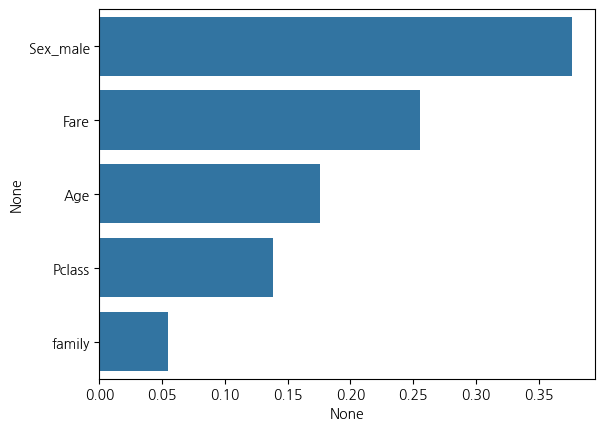

In [496]:
# 각 피처의 중요도를 feature_importances_를 통해 살펴본다.
best_df_clf = grid_cv.best_estimator_
ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

ftr_top = ftr_importances.sort_values(ascending=False)
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

### 랜덤 포레스트 이용

In [500]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=11)
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.8771


87.71%로 DecisionClassifier보다 더 좋은 예측 성능을 보임. GridSearchCV를 통해 랜덤 포레스트의 하이퍼 파라미터 튜닝을 시행

In [514]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [1, 5, 10, 15],
    'min_samples_split' : [2,10, 20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=5, n_jobs=-1)
grid_cv.fit(X_train , y_train)

print(grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
최고 예측 정확도: 0.8315


In [516]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=1,
                                 min_samples_split=10, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.8715


튜닝 후 예측 성능이 별 차이 없다. feature_importances_ 속성을 이용해 피처의 중요도 살펴본다.

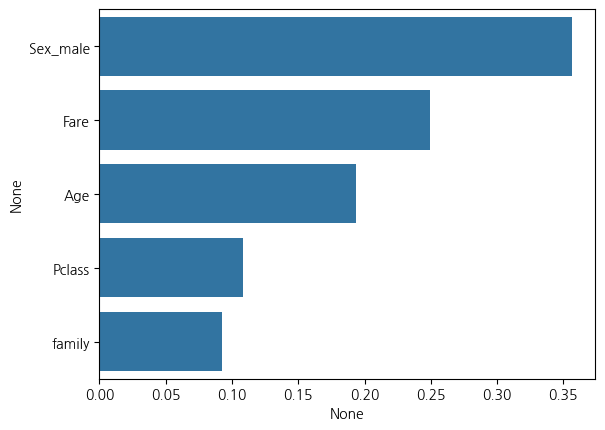

In [520]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

ftr_top = ftr_importances.sort_values(ascending=False)
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

### xgboost 이용(사이킷런 클래스중)

In [563]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
w_preds = xgb_clf.predict(X_test)
w_pred_proba = xgb_clf.predict_proba(X_test)[:,1]

In [565]:
accuracy = accuracy_score(w_preds, pred)
print('xgboost 정확도: {0:.4f}'.format(accuracy))

xgboost 정확도: 0.5754


예측 성능이 매우 낮게 나왔다. 타이타닉 target의 0,1 값의 불균형이 심하진 않지만, 평가 지표를 신뢰할 수 없기에 다른 평가 지표 및 함수를 정의해서 성능을 살펴본다

In [568]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [570]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[97 10]
 [18 54]]
정확도: 0.8436, 정밀도: 0.8438, 재현율: 0.7500,    F1: 0.7941, AUC:0.8873


대체로 예측 성능이 훨씬 더 좋게 나왔다. 타이타닉 데이터셋에 좀 더 적합한 평가 지표인 것 같다

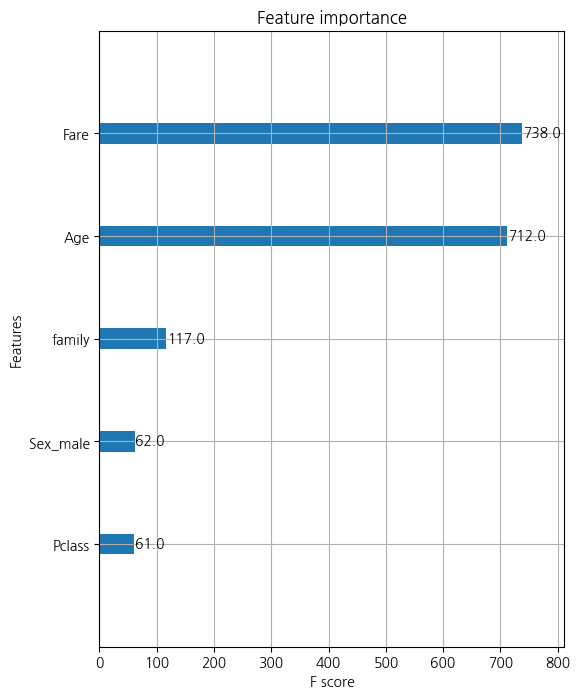

In [578]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(6, 8)) 
plot_importance(xgb_clf, ax=ax)
plt.show()